In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_trainn = x_train.reshape(-1, 784)
x_testt = x_test.reshape(-1, 784)
x_trainn = x_train.astype('float32')
x_testt = x_test.astype('float32')
x_trainn /= 255
x_testt /= 255


In [ ]:
modell = Sequential()
modell.add(Dense(360, activation='relu', input_shape=(784,)))
modell.add(Dropout(0.1))
modell.add(Dense(125, activation='relu'))
modell.add(Dropout(0.15))
modell.add(Dense(64, activation='relu'))
modell.add(Dropout(0.2))
modell.add(Dense(32, activation='relu'))

modell.add(Dense(64, activation='relu', input_shape=(784,)))
modell.add(Dropout(0.2))
modell.add(Dense(125, activation='relu'))
modell.add(Dropout(0.15))
modell.add(Dense(360, activation='relu'))
modell.add(Dropout(0.1))
modell.add(Dense(784, activation='sigmoid'))


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.92, beta_2=0.95,amsgrad=False)

In [ ]:
modell.compile(loss='binary_crossentropy',
 optimizer=opt,
 metrics=['accuracy'])

In [ ]:
historry = modell.fit(x_trainn, x_trainn,
 batch_size=128,
epochs=50,
shuffle=True,
verbose=1,
validation_data=(x_testt, x_testt))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.0092 - val_loss: 0.0039 - val_accuracy: 0.0091
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.0090 - val_loss: 0.0039 - val_accuracy: 0.0096
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.0082 - val_loss: 0.0039 - val_accuracy: 0.0096
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.0075 - val_loss: 0.0039 - val_accuracy: 0.0077
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0039 - accuracy: 0.0078 - val_loss: 0.0039 - val_accuracy: 0.0075
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.0080 - val_loss: 0.0039 - val_accuracy: 0.0068
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.0076 - val_loss: 0.0039 - val_accuracy: 0.0076
Epoch 

In [ ]:
prediction = modell.predict(x_testt)




313/313 [==============================] - 1s 2ms/step
[[7.4770590e-10 8.0194951e-10 1.1290199e-10 ... 1.2263604e-10
  1.9507491e-10 1.7852390e-10]
 [1.5019913e-07 1.7387283e-07 1.9210540e-07 ... 1.7766659e-07
  2.1997180e-07 2.0787660e-07]
 [4.1935545e-21 1.4119387e-21 1.6847185e-23 ... 1.5910122e-23
  2.2365549e-20 1.5791875e-20]
 ...
 [3.7771855e-08 2.2775902e-08 1.1539756e-08 ... 8.3630436e-09
  1.6004627e-08 1.8252321e-08]
 [1.5140742e-08 1.1699860e-08 3.8544821e-09 ... 5.1150155e-09
  1.0803690e-08 1.2580519e-08]
 [2.1990404e-07 3.2623484e-07 1.9163224e-07 ... 3.4100125e-07
  3.5638539e-07 3.0592031e-07]]


In [ ]:
import matplotlib.pyplot as plt

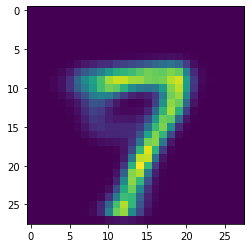

In [ ]:
plt.imshow(prediction[0].reshape(28,28))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) =mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


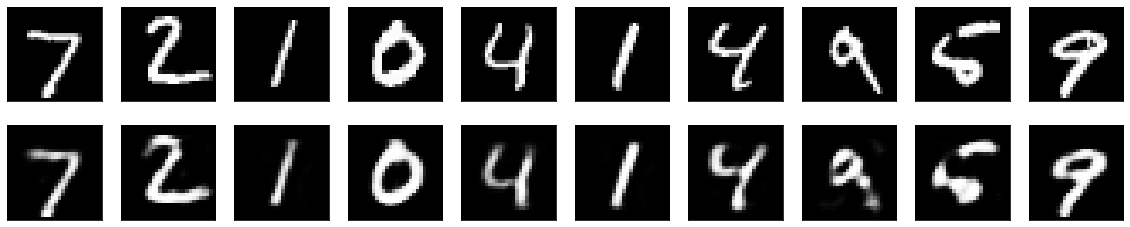

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

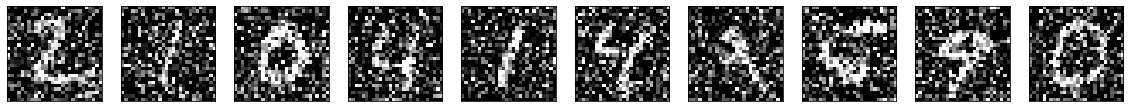

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 11s 8ms/step - loss: 0.1642 - val_loss: 0.1135
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1106 - val_loss: 0.1066
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1059 - val_loss: 0.1036
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1033 - val_loss: 0.1017
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1017 - val_loss: 0.1004
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1005 - val_loss: 0.0994
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0995 - val_loss: 0.0989
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0989 - val_loss: 0.0979
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0983 - val_loss: 0.0975
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0978 - val_l

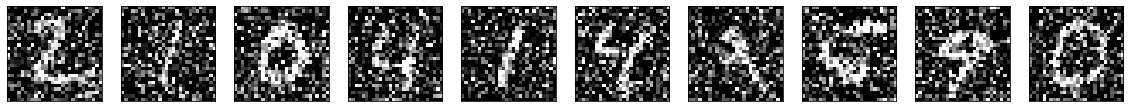

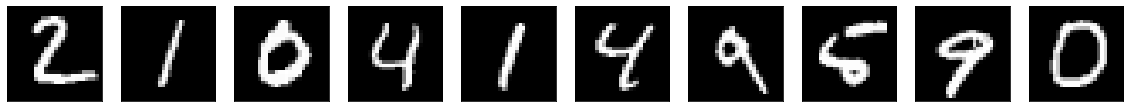

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()